### Observations
- There was an even number of males and females in the study. 
- Capomulin was the drug that had the smalles final tumor volume while Ceftamin seemed to have the largest tumor volume.
- There was a significant decrease in tumor volume for mouse s185 with every Timepoint.

In [1]:
## Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
## merge the data
main_df = mouse_metadata.merge(study_results, on='Mouse ID')
main_df = main_df.rename(columns=lambda x: x.lower().replace(' ', '_'))
dup_mouse = main_df.loc[main_df.duplicated(subset=['mouse_id', 'timepoint']), 'mouse_id'].unique()
clean_df = main_df[main_df['mouse_id'].isin(dup_mouse) == False]

## Summary Statistics

In [5]:
means = clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].mean()
medians = clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].median() 
variance = clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].var() 
std_dev = clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].std() 
std_err = clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].sem() 

summary_table = pd.DataFrame({
    'mean_tumor_volume': means,
    'median_tumor_volume': medians,
    'tumor_volume_variance': variance,
    'tumor_volume_std_dev': std_dev,
    'tumor_volume_std_err': std_err
})
summary_table 

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_std_err
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### DataFrame Plot

In [22]:
bar_data = clean_df['drug_regimen'].value_counts()

Text(0, 0.5, '# of Mice')

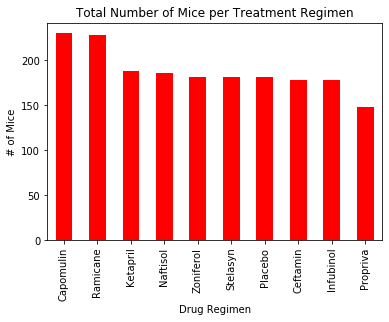

In [90]:
bar_data.plot(kind='bar', color = "r", title= "Total Number of Mice per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

#### Matplotlib Plot

Text(0, 0.5, '# of Mice')

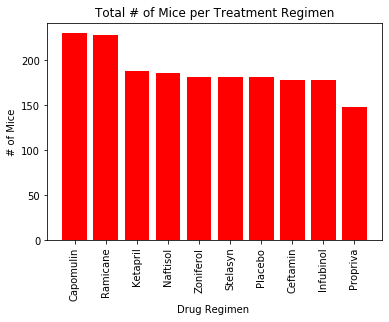

In [24]:
plt.bar( x=bar_data.index, height=bar_data.values, color ="r")
plt.title("Total # of Mice per Treatment Regimen")
plt.xlabel("Drug Regimen ")
plt.xticks(rotation = 90)
plt.ylabel("# of Mice")

### Pie Plot

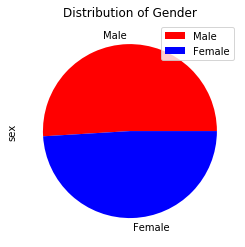

In [91]:
gender_count = clean_df['sex'].value_counts()
gender_count.plot(kind='pie', colors= ['r','b'])
plt.title("Distribution of Gender")
plt.legend()

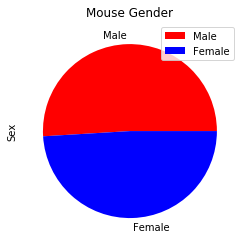

In [97]:
plt.pie(x= gender_count.values, labels = gender_count.index, colors= ['r','b'])
plt.title('Mouse Gender')
plt.legend()
plt.ylabel("Sex")
plt.show()

### Quartiles, Outliers and Boxplots

In [39]:
max_df = clean_df.groupby("mouse_id")["timepoint"].max().reset_index()
final_max = clean_df.merge(max_df, on=['mouse_id', 'timepoint'])

In [40]:
capomulin_df = final_max.loc[final_max["drug_regimen"]  == 'Capomulin']
ramicane_df = final_max.loc[final_max["drug_regimen"]  == 'Ramicane']
infubinol_df = final_max.loc[final_max["drug_regimen"]  == 'Infubinol']
ceftamin_df = final_max.loc[final_max["drug_regimen"]  == 'Ceftamin']

In [41]:
cap_vol = capomulin_df["tumor_volume_(mm3)"]
ram_vol = ramicane_df["tumor_volume_(mm3)"]
inf_vol = infubinol_df["tumor_volume_(mm3)"]
cef_vol = ceftamin_df["tumor_volume_(mm3)"]

In [74]:
all_data = [cap_vol, ram_vol, inf_vol, cef_vol]
drug_list= ["capomulin", "ramicane", "infubinol", "ceftamin"]

for i, drug in enumerate(all_data):
    quartiles = drug.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = higherq + (1.5 * iqr)
    
    print(f'Lower Quartile of {drug_list[i]}: {lowerq}')
    print(f'Upper Quartile of {drug_list[i]}: {higherq}')
    print('These are the outliers')
    print(drug[drug < lower_bound])
    print(drug[drug > upper_bound])
    print()

Lower Quartile of capomulin: 32.37735684
Upper Quartile of capomulin: 40.1592203
These are the outliers
Series([], Name: tumor_volume_(mm3), dtype: float64)
Series([], Name: tumor_volume_(mm3), dtype: float64)

Lower Quartile of ramicane: 31.56046955
Upper Quartile of ramicane: 40.65900627
These are the outliers
Series([], Name: tumor_volume_(mm3), dtype: float64)
Series([], Name: tumor_volume_(mm3), dtype: float64)

Lower Quartile of infubinol: 54.04860769
Upper Quartile of infubinol: 65.52574285
These are the outliers
74    36.321346
Name: tumor_volume_(mm3), dtype: float64
Series([], Name: tumor_volume_(mm3), dtype: float64)

Lower Quartile of ceftamin: 48.72207785
Upper Quartile of ceftamin: 64.29983003
These are the outliers
Series([], Name: tumor_volume_(mm3), dtype: float64)
Series([], Name: tumor_volume_(mm3), dtype: float64)



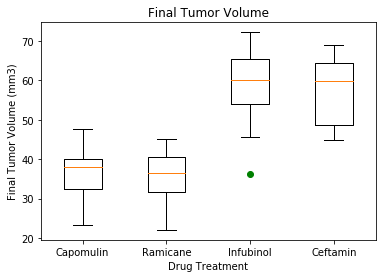

In [75]:
plt.boxplot([cap_vol,ram_vol,inf_vol,cef_vol],
            labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"],
            sym="g")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Treatment")
plt.title("Final Tumor Volume")
plt.show()

### Line plot - Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse

In [102]:
## mouse 
Cap = clean_df.loc[clean_df["drug_regimen"]  == 'Capomulin']
mouse_no = Cap.loc[Cap["mouse_id"]  == 's185']
time_point = mouse_no['timepoint']
tumor_vol = mouse_no['tumor_volume_(mm3)']

Text(0.5, 1.0, 'Capomulin Mouse ID s185')

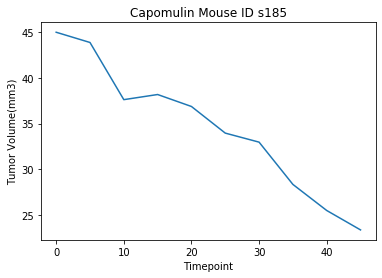

In [101]:
plt.plot(time_point, tumor_vol)
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Timepoint")
plt.title("Capomulin Mouse ID s185")

### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

In [84]:
avg_tumor_volume = Cap.groupby("mouse_id").mean()
avg_tumor_volume.head()

,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
mouse_id,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


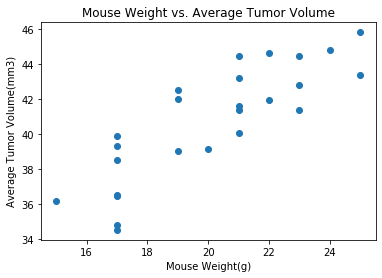

In [100]:
mouse_weight = avg_tumor_volume["weight_(g)"]
avg_tumor_vol = avg_tumor_volume["tumor_volume_(mm3)"]
plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.show()

### Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment

R Val is 0.7088568047708717


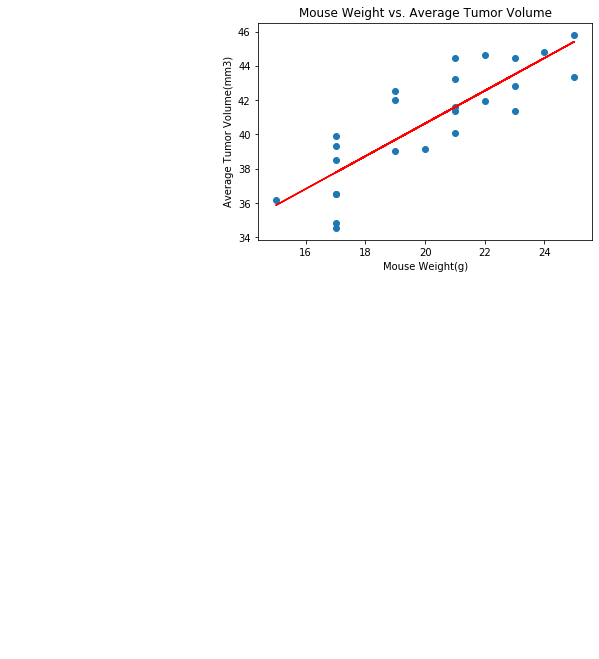

In [99]:
mouse_weight = avg_tumor_volume["weight_(g)"]
avg_tumor_vol = avg_tumor_volume["tumor_volume_(mm3)"]
x_values = avg_tumor_volume['weight_(g)']
y_values = avg_tumor_volume['tumor_volume_(mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title("Mouse Weight vs. Average Tumor Volume")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"R Val is {rvalue **2}")
plt.show()